In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import Imputer


from sklearn.tree import DecisionTreeClassifier      # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics                          #Import scikit-learn metrics module for accuracy calculation

from modules import gbvoid_dataset as gbvoid

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/preprocessing/__init__.py)

In [16]:
void_cla=pd.read_csv('/home/estanislao/Documents/ML_GB/GrainLearning/output/void_cla_df.csv',index_col=0)
void_cla.head()

,misorientation,Length,Trace,Sigma,Distance_Center,Void
0,55.90,2.000,180.0,4.36676,630.941584,0.0
1,9.33,1.155,150.0,5.88679,622.477160,0.0
2,32.61,1.155,30.0,5.81996,603.104097,0.0
3,7.38,1.155,30.0,5.68624,574.944824,0.0
4,41.18,1.155,150.0,4.41218,548.559794,0.0


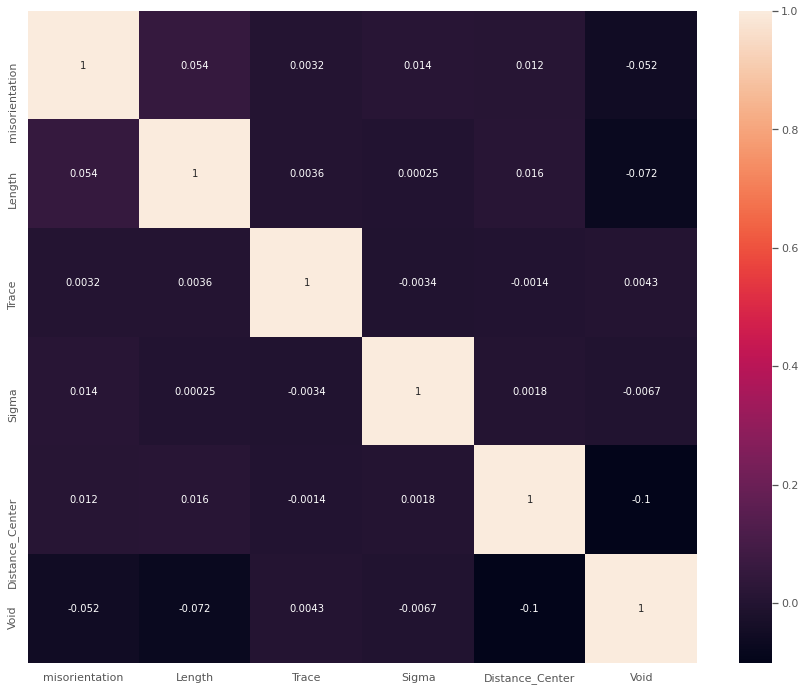

In [18]:
#sns.set(rc={'figure.figsize':(15,12)})
plt.style.use('ggplot')
corrMatrix = void_cla.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [37]:
y = void_cla['Void'].values             # Target variable
X = void_cla.drop('Void',axis=1).values # Features
#X = void_cla[['misorientation', 'Length', 'Trace', 'Sigma','Distance_Center']] # Features
#y = void_cla.Void # Target variable

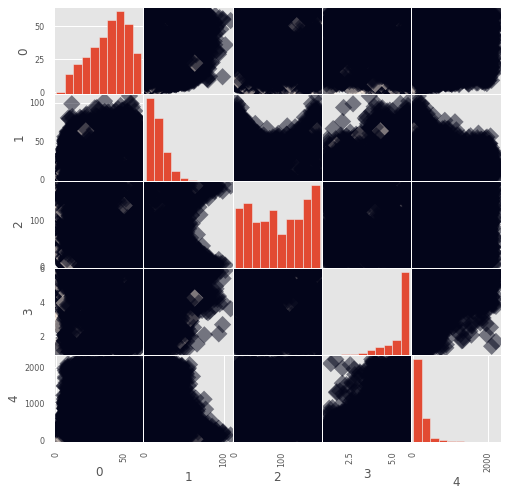

In [38]:
_=pd.plotting.scatter_matrix(df_cla,c=y,figsize=[8, 8], s=150, marker='D')

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratfy=y) # 70% training and 30% test
# drop stratfy=y

In [70]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)


# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))


Accuracy with Scaling: 0.9896996152452596
Accuracy without Scaling: 0.9918563122207077


Accuracy: 0.9928742731931193
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     57281
         1.0       0.78      0.54      0.64       678

    accuracy                           0.99     57959
   macro avg       0.89      0.77      0.82     57959
weighted avg       0.99      0.99      0.99     57959

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1}
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     57281
         1.0       0.78      0.54      0.64       678

    accuracy                           0.99     57959
   macro avg       0.89      0.77      0.82     57959
weighted avg       0.99      0.99      0.99     57959

0.9932020911333874


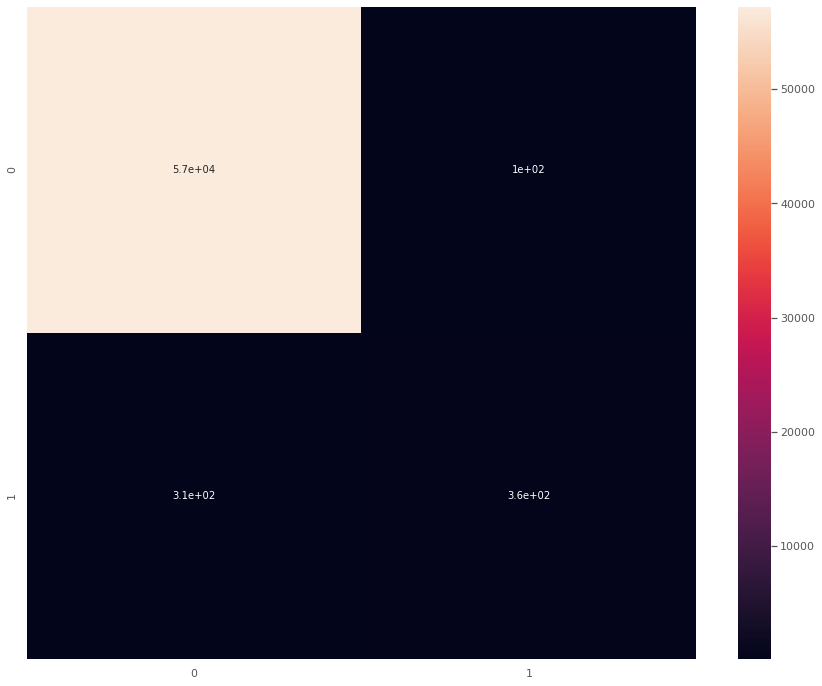

In [78]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,param_grid=parameters)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, y_pred))
print(knn.score(X_test, y_test))

/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 622.4462076454843, tolerance: 0.12560682053462663
  model = cd_fast.enet_coordinate_descent(
/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 627.6475624017082, tolerance: 0.12668087698379515
  model = cd_fast.enet_coordinate_descent(
/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 610.4839223838051, tolerance: 0.12316499644141467
  model = cd_fast.enet_coordinate_descent(
/home/estanislao/anaconda3/envs/GBL/lib/

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.013611017793391578
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     57281
         1.0       0.78      0.54      0.64       678

    accuracy                           0.99     57959
   macro avg       0.89      0.77      0.82     57959
weighted avg       0.99      0.99      0.99     57959

0.9932020911333874


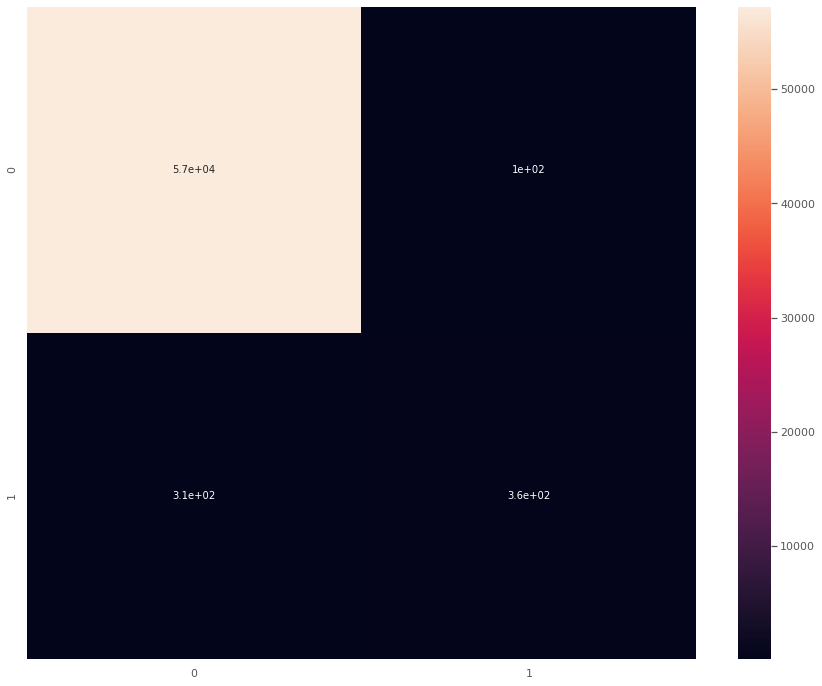

In [80]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)
gm_cv.predict(X_test)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, y_pred))
print(knn.score(X_test, y_test))

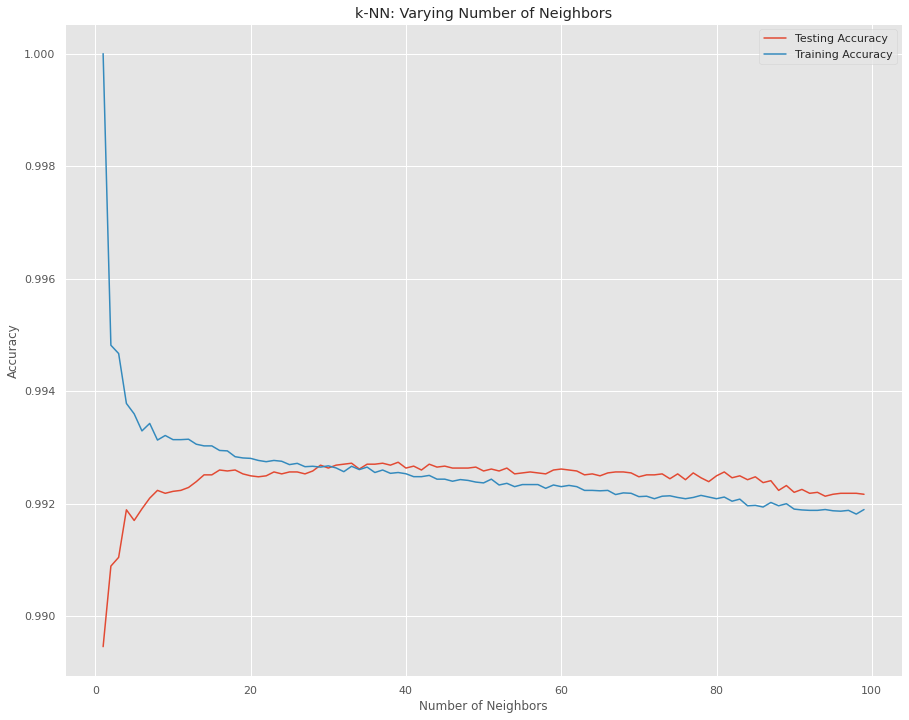

In [50]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 100)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(L=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

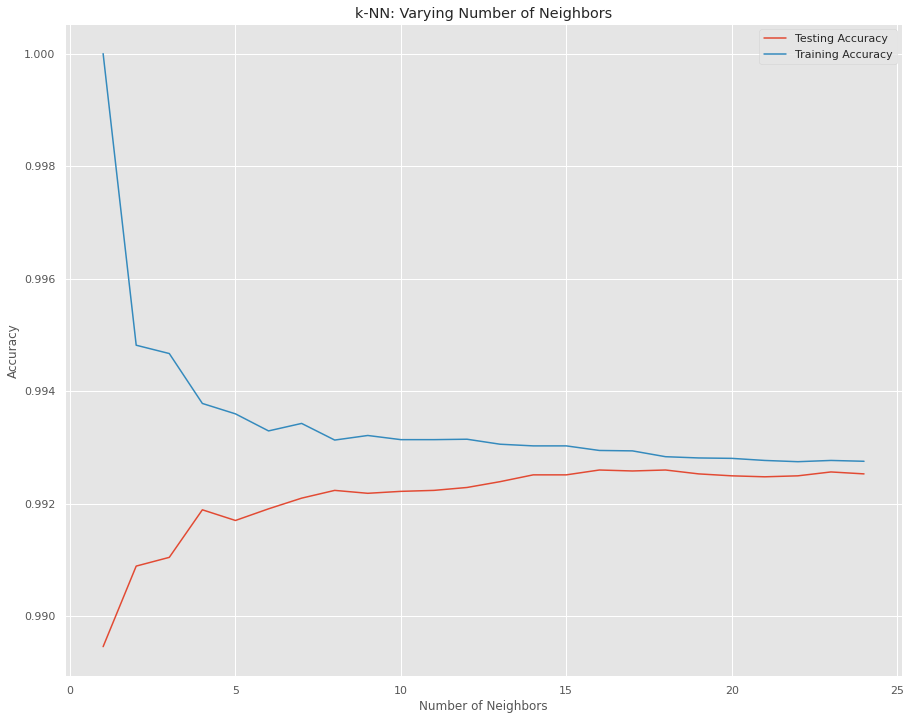

In [52]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [82]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid, cv=5)
print(param_grid.keys())

dict_keys(['n_neighbors'])


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     57280
         1.0       0.75      0.56      0.64       679

    accuracy                           0.99     57959
   macro avg       0.87      0.78      0.82     57959
weighted avg       0.99      0.99      0.99     57959

0.9925809624044584


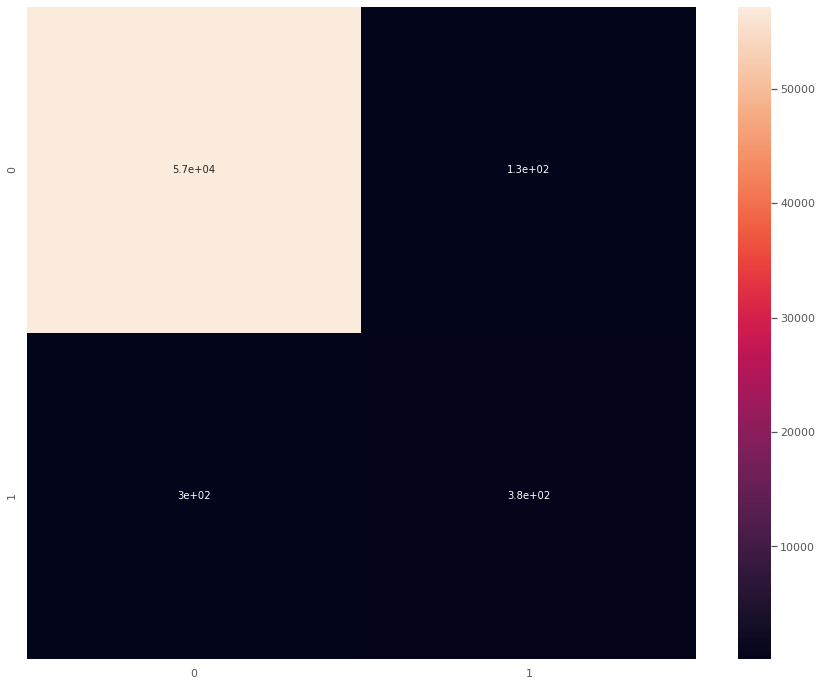

In [54]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, y_pred))
print(knn.score(X_test, y_test))

[[76140   198]
 [  435   505]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     76338
         1.0       0.72      0.54      0.61       940

    accuracy                           0.99     77278
   macro avg       0.86      0.77      0.81     77278
weighted avg       0.99      0.99      0.99     77278



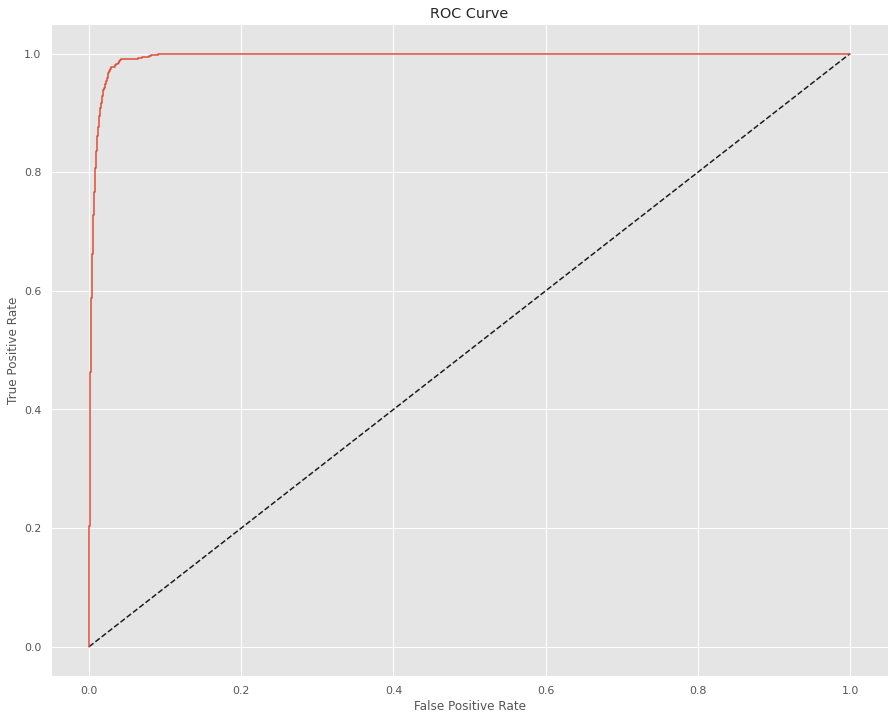

In [58]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [62]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test,y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 10-fold cross-validation: {}".format(cv_auc))

AUC: 0.9944292265696291
AUC scores computed using 5-fold cross-validation: [0.99396094 0.99537477 0.99285672 0.9962336  0.99106945 0.99574926
 0.997451   0.98924987 0.99502714 0.99609202]


In [63]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.0007196856730011522}
Best score is 0.9919821983035828


In [64]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/model_selection/_validation.p

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 8}
Best score is 0.9918217345169389


In [65]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

Tuned Logistic Regression Parameter: {'C': 0.0007196856730011522, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9920719110648623


In [66]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 515.372307636142, tolerance: 0.10488606213537931
  model = cd_fast.enet_coordinate_descent(
/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516.045296253358, tolerance: 0.10498377276697547
  model = cd_fast.enet_coordinate_descent(
/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 517.5657990968383, tolerance: 0.10537460694027986
  model = cd_fast.enet_coordinate_descent(
/home/estanislao/anaconda3/envs/GBL/lib/py

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.018092927697533456
Tuned ElasticNet MSE: 0.011798512900946832


/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642.256394906584, tolerance: 0.13069229707463484
  model = cd_fast.enet_coordinate_descent(
